## Graph Theory and Network Composition

In [150]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [151]:
G = nx.Graph()

In [152]:
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])

In [153]:
print('Order: ',G.order())
print('Number of nodes: ',G.number_of_nodes())
print('Size: ',G.size())
print('Number of edges: ',G.number_of_edges())

Order:  3
Number of nodes:  3
Size:  2
Number of edges:  2


In [154]:
print('Average degree: ',sum(dict(G.degree()).values())/G.order())

Average degree:  1.3333333333333333


In [155]:
print('Density: ',nx.density(G))
print('Diameter: ',nx.diameter(G))
print('Average shortest path length: ',nx.average_shortest_path_length(G))

Density:  0.6666666666666666
Diameter:  2
Average shortest path length:  1.3333333333333333


___

## Node Centrality Metrics

In [156]:
betweenness = nx.betweenness_centrality(G, weight='edge')
closeness = nx.closeness_centrality(G, distance='edge')
eigenvector = nx.eigenvector_centrality_numpy(G)
degree = nx.degree_centrality(G)
pagerank = nx.pagerank(G)

In [157]:
print('betweenness: ',betweenness)
print('closeness: ',closeness)
print('eigenvector: ',eigenvector)
print('degree: ',degree)
print('pagerank: ',pagerank)

betweenness:  {1: 1.0, 2: 0.0, 3: 0.0}
closeness:  {1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}
eigenvector:  {1: 0.7071067811865476, 2: 0.5, 3: 0.5}
degree:  {1: 1.0, 2: 0.5, 3: 0.5}
pagerank:  {1: 0.48648582432442095, 2: 0.25675708783778944, 3: 0.25675708783778944}


___

## Loading Tabular Data

In [158]:
import pandas as pd

In [159]:
us_w_gym = pd.read_csv('data/us_womens_gymnastics.csv')

display(us_w_gym.head())

,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [160]:
print('Shape us_w_gym DF >> Rows: ',us_w_gym.shape[0],' | Columns: ',us_w_gym.shape[1])

Shape us_w_gym DF >> Rows:  2866  | Columns:  4


# Rows Represent Transactions or Interactions
Use your Python skills, use Pandas to read and aggregate the data by the `Name_x` and `Name_y` fields and count the number of events in which they have an interaction. Once you have done this, sort descending by the number of pairwise interactions. Which pair of gymnasts have competed in the most events together?

Now that we have a data frame in this format, Networkx provides us with an easy way to turn it into a graph via the from_pandas_edgelist method.

In [161]:
G = nx.from_pandas_edgelist(df=us_w_gym, source='Name_x', target='Name_y')

Use this method to turn the data frame into a graph and then practice computing the graph statistics and centrality measures we covered in the previous section. Below are some questions to answer about this graph.

    1. How many gymnasts (nodes) are in the graph?
    2. How many edges are in the graph?
    3. What is the average degree?
    4. What is the density of the graph?
    5. Is this graph fully-connected? How do you know?
    6. What gymnast has the highest betweenness centrality?
    7. What gymnast has the highest Eigenvector centrality?
    8. What gymnast has the highest degree centrality?

#### 1. How many gymnasts (nodes) are in the graph?

In [162]:
print(G.number_of_nodes())

94


#### 2. How many edges are in the graph?

In [163]:
print(G.number_of_edges())

292


#### 3. What is the average degree?

In [164]:
print(sum(dict(G.degree()).values())/G.order())

6.212765957446808


#### 4. What is the density of the graph?

In [165]:
print(nx.density(G))

0.06680393502630977


##### 5. Is this graph fully-connected? How do you know?

In [166]:
print(nx.is_connected(G))

False


#### 6. What gymnast has the highest betweenness centrality?

In [167]:
# Compute the shortest-path betweenness centrality for nodes. 
# Betweenness centrality of a node v is the sum of the fraction of all-pairs 
# shortest paths that pass through v

betweenness = nx.betweenness_centrality(G, weight='edge')
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print(betweenness_sorted[0][0],' >> ',betweenness_sorted[0][1])

Linda Joan Metheny (-Mulvihill)  >>  0.05002337540906966


#### 7. What gymnast has the highest Eigenvector centrality?

In [168]:
# Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors

eigenvector = nx.eigenvector_centrality_numpy(G)
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
print(eigenvector_sorted[0][0],' >> ',eigenvector_sorted[0][1])

Meta Elste (Neumann-)  >>  0.3306259403012172


#### 8. What gymnast has the highest degree centrality?

In [169]:
# The degree centrality for a node v is the fraction of nodes it is connected to.


degree = nx.degree_centrality(G)
degree_sorted = sorted(degree.items(), key=lambda x: x[1], reverse=True)
print(degree_sorted[0][0],' >> ',degree_sorted[0][1])

Consetta Anne "Connie" Caruccio-Lenz  >>  0.15053763440860216


___

# Rows Represent Entities

In [170]:
us_m_bask = pd.read_csv('data/us_mens_basketball.csv')

display(us_m_bask.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [171]:
print('Shape us_m_bask DF >> Rows: ',us_m_bask.shape[0],' | Columns: ',us_m_bask.shape[1])

Shape us_m_bask DF >> Rows:  222  | Columns:  15


In [172]:
# It generates a dataframe with the two first columns as Players and the third common olympics played

def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [173]:
basketball = df_to_graph(us_m_bask,entity='Name',edge='Games')
print(basketball.columns)

Index(['Name_x', 'Name_y', 'Games'], dtype='object')


In [174]:
display(basketball.head())

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


In [175]:
B = nx.from_pandas_edgelist(df=basketball, source='Name_x', target='Name_y')

Use this method to turn the data frame into a graph and then practice computing the graph statistics and centrality measures we covered in the previous section. Below are some questions to answer about this graph.

    1. How many gymnasts (nodes) are in the graph?
    2. How many edges are in the graph?
    3. What is the average degree?
    4. What is the density of the graph?
    5. Is this graph fully-connected? How do you know?
    6. What gymnast has the highest betweenness centrality?
    7. What gymnast has the highest Eigenvector centrality?
    8. What gymnast has the highest degree centrality?

#### 1. How many gymnasts (nodes) are in the graph?

In [176]:
print(B.number_of_nodes())

196


#### 2. How many edges are in the graph?

In [177]:
print(B.number_of_edges())

1232


#### 3. What is the average degree?

In [178]:
print(sum(dict(B.degree()).values())/B.order())

12.571428571428571


#### 4. What is the density of the graph?

In [179]:
print(nx.density(B))

0.06446886446886448


##### 5. Is this graph fully-connected? How do you know?

In [180]:
print(nx.is_connected(B))

False


#### 6. What gymnast has the highest betweenness centrality?

In [181]:
# Compute the shortest-path betweenness centrality for nodes. 
# Betweenness centrality of a node v is the sum of the fraction of all-pairs 
# shortest paths that pass through v

betweenness = nx.betweenness_centrality(B, weight='edge')
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print(betweenness_sorted[0][0],' >> ',betweenness_sorted[0][1])

Gary Dwayne Payton  >>  0.09193761564895586


#### 7. What gymnast has the highest Eigenvector centrality?

In [182]:
# Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors

eigenvector = nx.eigenvector_centrality_numpy(B)
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
print(eigenvector_sorted[0][0],' >> ',eigenvector_sorted[0][1])

Carmelo Kyan Anthony  >>  0.3418500566719078


#### 8. What gymnast has the highest degree centrality?

In [183]:
# The degree centrality for a node v is the fraction of nodes it is connected to.


degree = nx.degree_centrality(B)
degree_sorted = sorted(degree.items(), key=lambda x: x[1], reverse=True)
print(degree_sorted[0][0],' >> ',degree_sorted[0][1])

Carmelo Kyan Anthony  >>  0.18461538461538463


___

# Visualization of Network Data

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


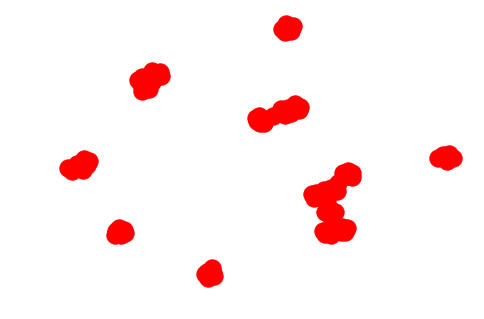

In [184]:
nx.draw(G)

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


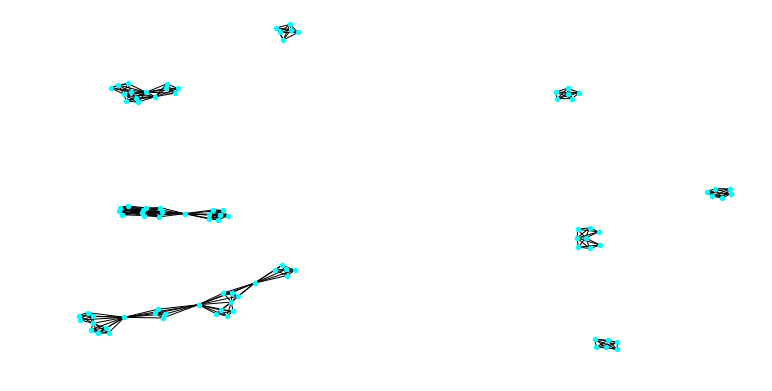

In [185]:
plt.figure(figsize=(10,5))
nx.draw(G, node_size=20, node_color='cyan')

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


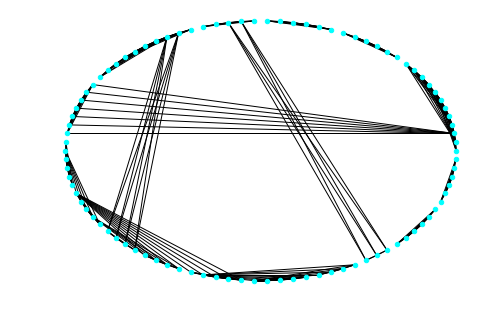

In [186]:
nx.draw_circular(G, node_size=20, node_color='cyan')

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


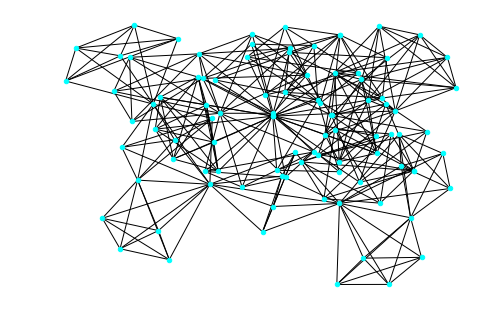

In [187]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

In [188]:
# Using nxviz module
from nxviz import CircosPlot
from nxviz import MatrixPlot
from nxviz import ArcPlot

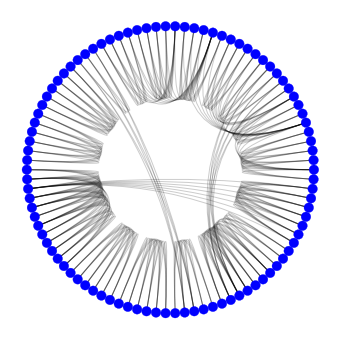

In [189]:
# Circos plot
c = CircosPlot(G)
c.draw()

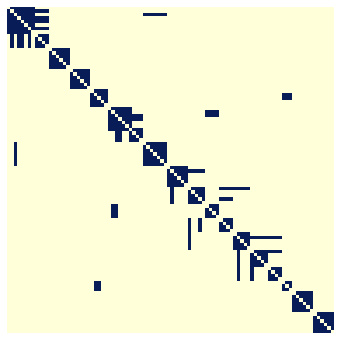

In [190]:
# Matrix plot
m = MatrixPlot(G)
m.draw()

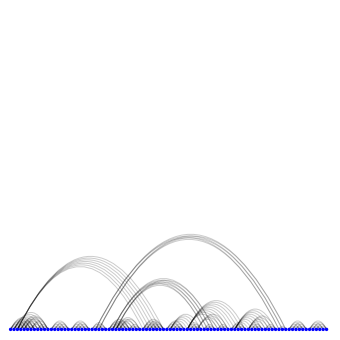

In [191]:
#Arc Plots
a = ArcPlot(G)
a.draw()

# Bar Charts

,Games
Name,
Adrian Delano Dantley,1976 Summer
Adrian Howard Smith,1960 Summer
"Alexander John ""Alex"" Groza",1948 Summer
Allan Wade Houston,2000 Summer
Allen Ezail Iverson,2004 Summer


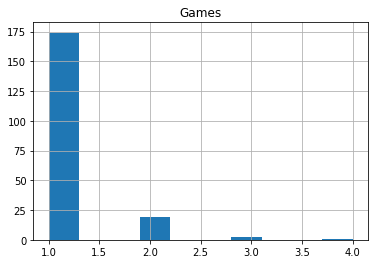

In [192]:
display(us_m_bask.groupby('Name').agg({'Games': np.unique}).head())
basketball_group = us_m_bask[['Name', 'Games']].groupby('Name').agg(np.size).sort_values(by='Games', ascending=False)
basketball_group.hist()
plt.show()

/home/ivan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


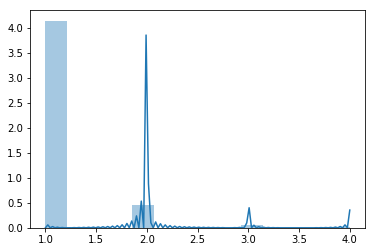

In [193]:
sns.distplot(basketball_group)
plt.show()

### Now with gymnastics

In [194]:
display(us_w_gym.head())

,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [195]:
us_w_gym[['Name_x','Name_y','Games']].groupby('Name_x').agg({'Name_y':'count','Games':np.unique}).head()

,Name_y,Games
Name_x,,
"Ada Lunardoni (-Cumiskey, -Hutcheon)",7,1936 Summer
Adelaide Meyer,7,1936 Summer
"Alexandra Rose ""Aly"" Raisman",30,"[2012 Summer, 2016 Summer]"
Alicia Marie Sacramone (-Quinn),16,2008 Summer
Amanda Kathleen Borden (-Cochran),22,1996 Summer


___

# Deeper Analysis of Networks

**US Men Basketbal**

In [208]:
ego_B = nx.ego_graph(B, 'Adrian Delano Dantley', radius=1)

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


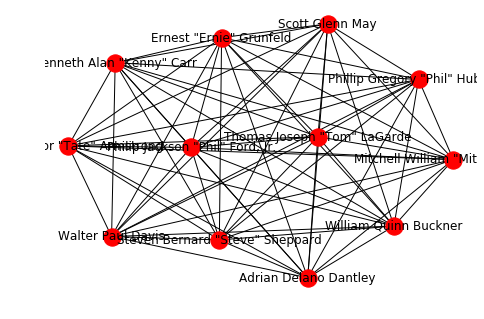

In [209]:
nx.draw(ego_B, with_labels=True)

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


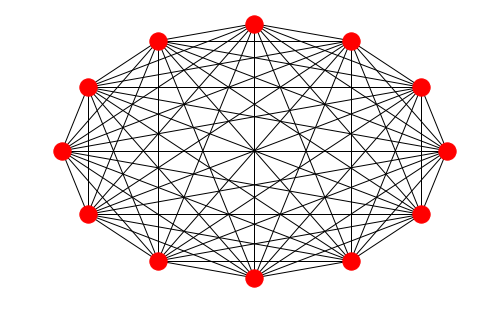

In [210]:
nx.draw_circular(ego_B)

**US Women Gymnastics**

In [213]:
ego_G = nx.ego_graph(G, 'Linda Joan Metheny (-Mulvihill)', radius=1)

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


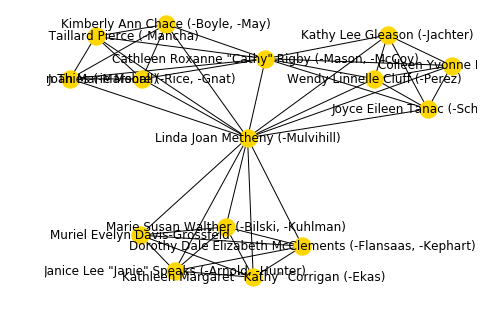

In [214]:
nx.draw(ego_G,with_labels=True,node_color='gold')

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


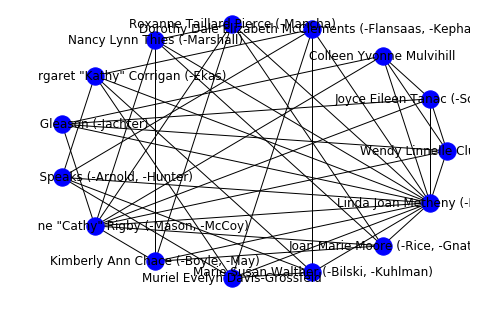

In [216]:
nx.draw_circular(ego_G,with_labels=True,node_color='blue')

___

# Community Detection

In [217]:
import community

**US Women Gymnastics**

In [221]:
parts = community.best_partition(G)

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


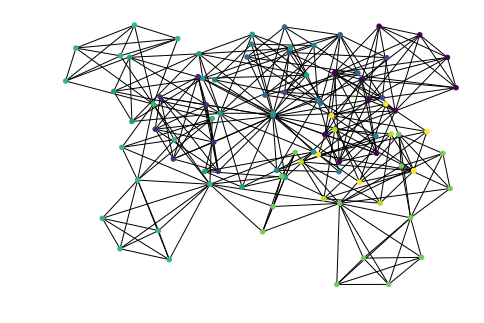

In [220]:
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=20, node_color=values)

**US Men Basketbal**

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


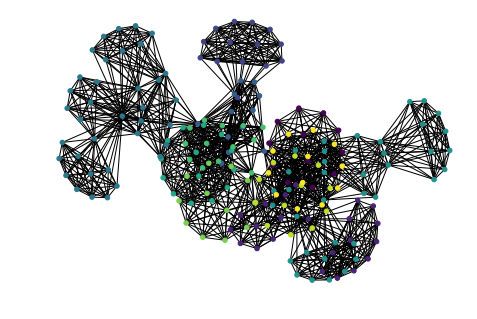

In [224]:
parts = community.best_partition(B)
values = list(parts.values())
nx.draw_kamada_kawai(B, node_size=20, node_color=values)

# Hierarchical Graphs

In [225]:
# Create a graph with Games as the entities and then produce a visualization showing the network.

basketball2 = df_to_graph(us_m_bask, entity='Games', edge='Name')
basketball2.head()

,Games_x,Games_y,Name
2,1948 Summer,1952 Summer,1
3,1952 Summer,1948 Summer,1
5,1952 Summer,1956 Summer,1
6,1956 Summer,1952 Summer,1
8,1956 Summer,1960 Summer,1


In [228]:
B2 = nx.from_pandas_edgelist(basketball2, source='Games_x', target='Games_y', edge_attr='Name')

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


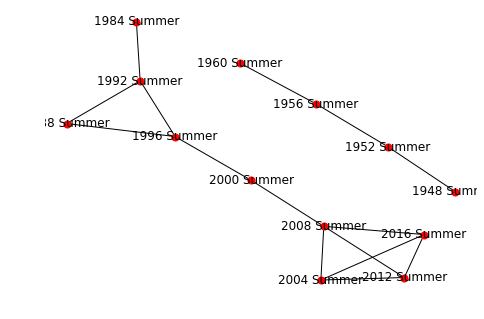

In [230]:
nx.draw_kamada_kawai(B2, node_size=50, with_labels=True)

___

# Bonus: More Complex Networks

In [239]:
B_B = nx.from_pandas_edgelist(basketball, source='Name_x', target='Name_y', edge_attr='Games')


G_G = nx.from_pandas_edgelist(us_w_gym, source='Name_x', target='Name_y', edge_attr='Games')

In [254]:
display(basketball.head())
display(us_w_gym.head())

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [255]:
F = nx.compose(G_G,B_B)

In [256]:
ego = nx.ego_graph(F, 'Philip Jackson "Phil" Ford, Jr.', radius=1)

/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/ivan/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


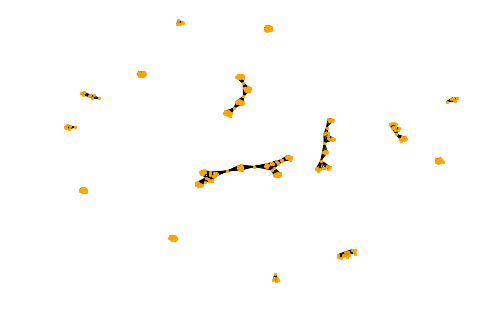

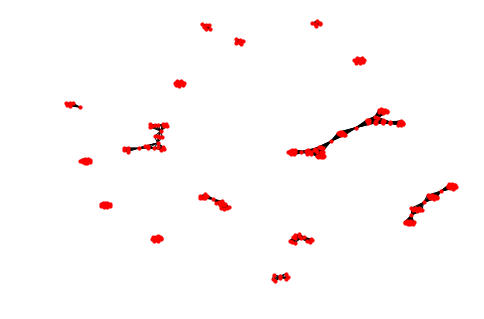

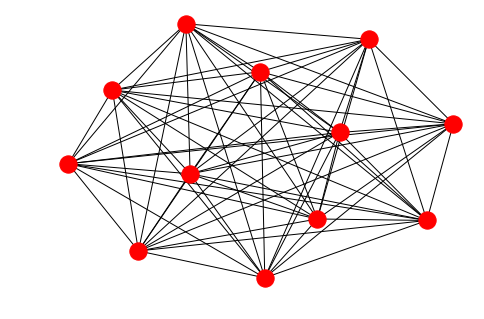

In [257]:
plt.figure(1)
nx.draw(F,node_size=5,node_color='orange')
plt.figure(2)
nx.draw(F,node_size=10)
plt.figure(3)
nx.draw(ego)

___